In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import datasets as d"
import seaborn as sns
import set_dataset as k
import pandas_profiling
import importlib
%matplotlib inline
importlib.reload(k)

<module 'set_dataset' from '/Users/kelvin/GAMES/src/set_dataset.py'>

In [7]:
path = '/Users/kelvin/'
steam_features = pd.read_csv(path + 'GAMES/data/games-features.csv').rename(columns={'QueryID':'appid'})

In [9]:
pd.set_option('display.max_columns', 500)
df = pd.read_csv('cleaned_df.csv')
df.shape

(27075, 426)

# Getting Label

In [10]:
## Total Ratings
df['total_ratings'] = df.positive_ratings + df.negative_ratings

In [11]:
## Quantiles
df['total_ratings'].quantile([0,.25,.5,.70,.85,.9,1])

0.00          1.0
0.25         10.0
0.50         36.0
0.70        118.0
0.85        450.9
0.90        908.6
1.00    3046717.0
Name: total_ratings, dtype: float64

### Weights

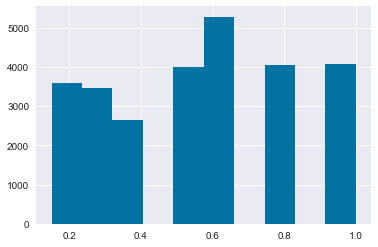

In [13]:
## Weights per game based on quantiles
df['weight_total_quantile']= pd.qcut(df['total_ratings'], [0,.12,.25, .35,.50,.70,.85,.99,1], labels=[0.15,.25, .40,0.55, .63,.80, .92, 1]).astype(float)
df.weight_total_quantile.hist()

### Pos Rating Ratio Weighted

Text(0.5, 1.0, "Distribution of Game's Rating Weighted")

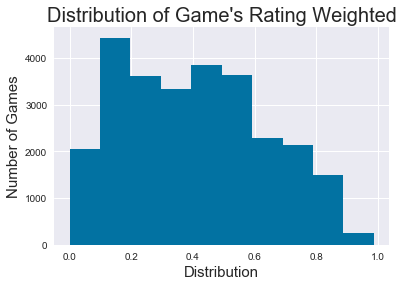

In [21]:
## Getting ratio of positives over total
division = (df.positive_ratings / df.total_ratings)
## Weighting ratio by distribution of total ratings
ratio_weighted = division * df.weight_total_quantile.astype(float)
ratio_weighted.hist()
plt.xlabel("Distribution", fontsize=15)
plt.ylabel("Number of Games", fontsize=15)
plt.title("Distribution of Game's Rating Weighted", fontsize=20)

## Y == Ratio Weigthed > 70%

In [ ]:
y = (ratio_weighted > 0.65).astype(int)

In [ ]:
## 1=Success, 0=Fail
print(sum(y==1)/y.shape[0])
y.value_counts()

In [ ]:
print("shape before: ", df.shape)
#df = df.loc[:, (df==0).mean() < .90]
print("shape after: ", df.shape)

In [ ]:
## THERE ARE SOME REPETITIVE GAMES 
#df[df.name.isin(df.name[df.name.duplicated()])].sort_values('name').head()

In [ ]:
x = df.drop(['appid', 'name', 'days_since', 'positive_ratings', 'negative_ratings', 'estimated_revenue', 'weight_total_quantile', 'total_ratings'], axis=1)
x = x.drop(['average_playtime', 'median_playtime', 'release_years_ago'], axis=1)

In [ ]:
x.shape

## Modeling XGB

In [ ]:
y_test, y_pred, y_prob = k.xgb(x,y)

In [ ]:
k.metrics(y_test, y_pred, y_prob)

In [ ]:
tn, fp, fn, tp = matrix.ravel()
tn, fp, fn, tp

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_prob[:, 1])
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))